# Data Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). 

A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

The prediction task is to determine whether a person makes over $50K a year.

# Import Required Library

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [83]:
#importing dataset from github

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Totally, We have a 15 columns in the dataset and Income column is the target. Based on the feature column we have to predict the target column.

In [84]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

The above code will help me to view all the columns and row if needed place in upcomig step.

# Checking Unique Value only in doubtfull categorical columns

In [85]:
df["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [86]:
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [88]:
df["Education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [89]:
df["Marital_status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [90]:
df["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [91]:
df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [92]:
df["Race"].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [93]:
df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [97]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Based on the above step - I have identified the " ?" in the 3 columns which is "Workclass","Occupation" and "Native_country".

So, we can replace the null in the next step to fill the data.

In [99]:
df=df.replace(" ?",np.nan)

In [100]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [102]:
df["Workclass"]=df["Workclass"].fillna("Private")
df["Occupation"]=df["Occupation"].fillna("Prof-specialty")
df["Native_country"]=df["Native_country"].fillna("United-States")

This three columns are category based column. So, I have decided to fill the null value based the mode data which are already find in the above column as value count.

# Checking Null Value Again:

In [103]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We don't have a null value in the dataset. However, I will ensure with heatmap in next step.

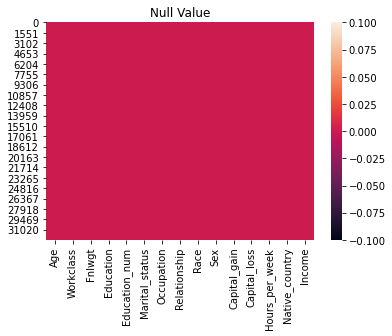

In [104]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Visualization of Data:

I am going to make the data based on category and numerical in the dataset which will help me to understand more in the visualization.

In [105]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [106]:
CDF=df.select_dtypes(include = ["object"]).keys()
CDF

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [107]:
NDF=df.select_dtypes(include = ["int64"]).keys()
NDF

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

I have created the data for visualization for upcoming step

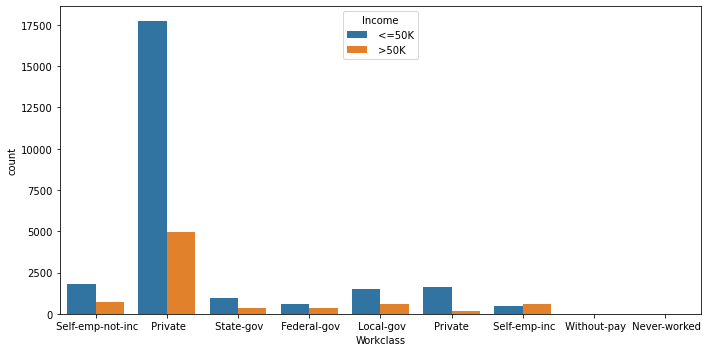

In [110]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Workclass', hue='Income', data=df)
plt.tight_layout()
plt.show()

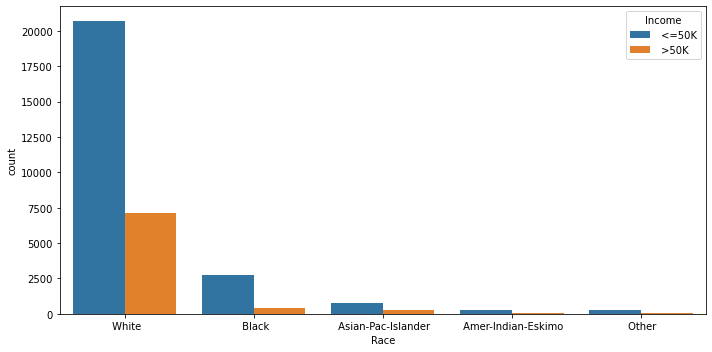

In [111]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Race', hue='Income', data=df)
plt.tight_layout()
plt.show()

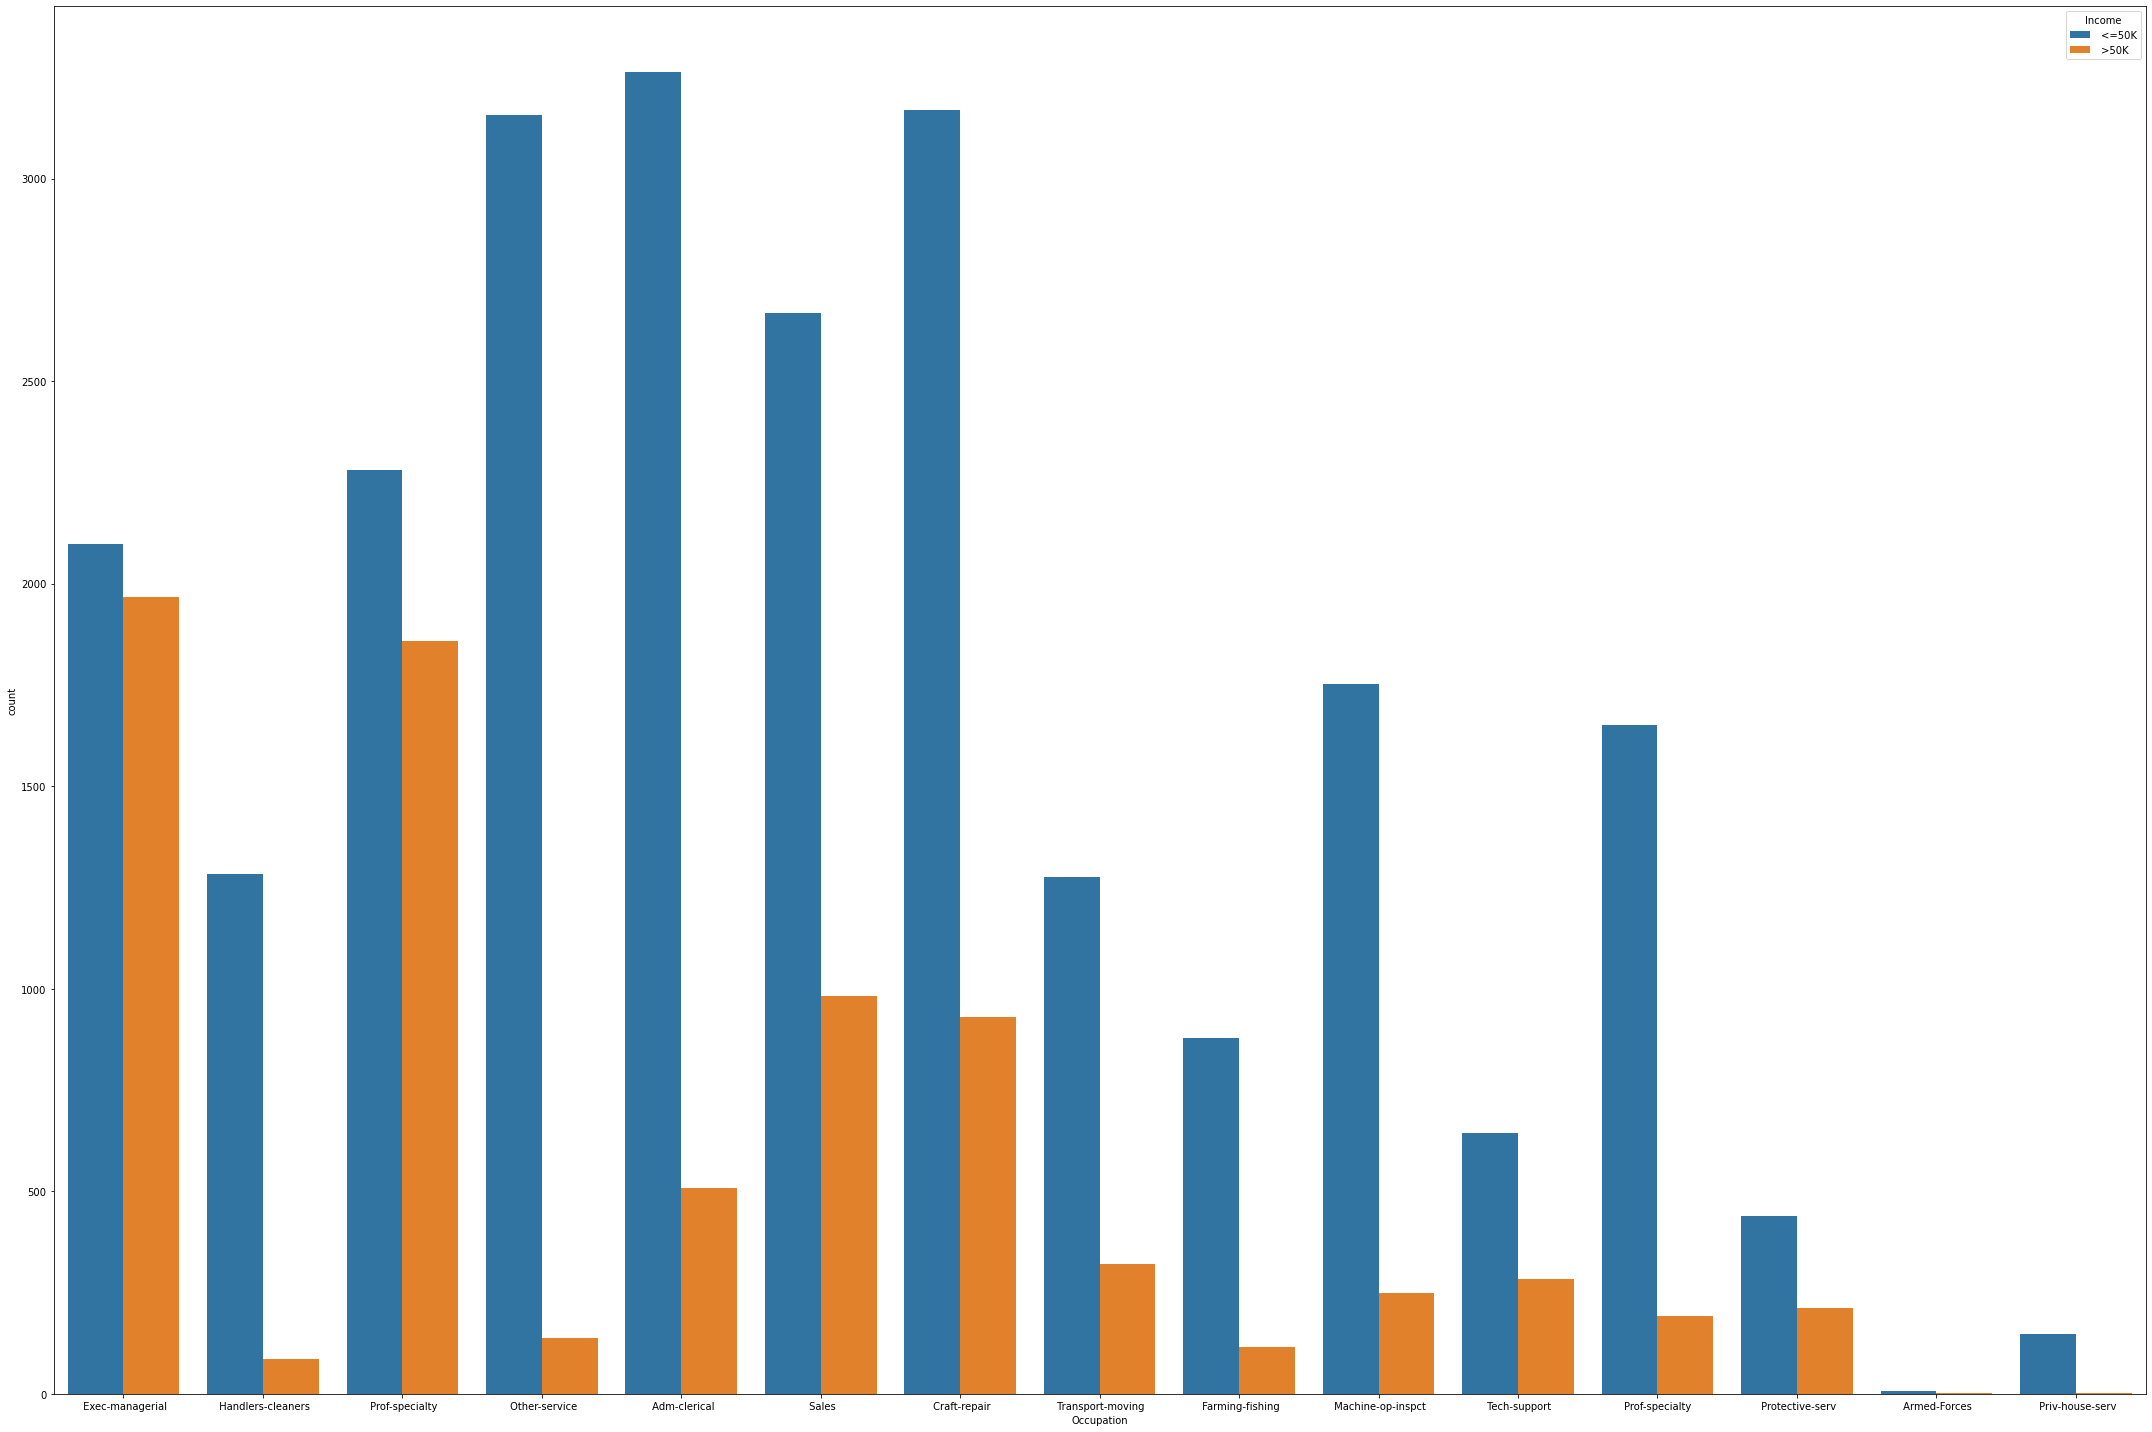

In [115]:
fig = plt.figure(figsize=(30,20))
sns.countplot('Occupation', hue='Income', data=df)
plt.tight_layout()
plt.show()

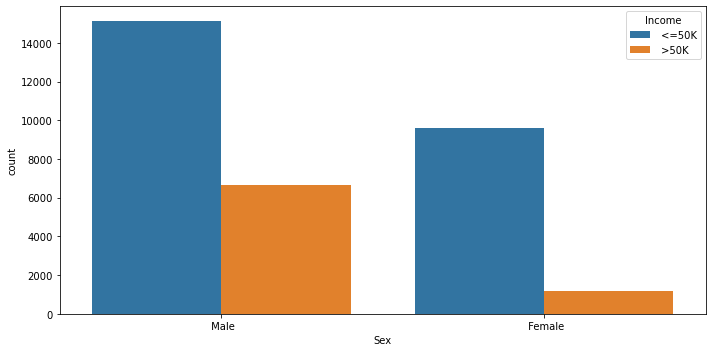

In [113]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Sex', hue='Income', data=df)
plt.tight_layout()
plt.show()

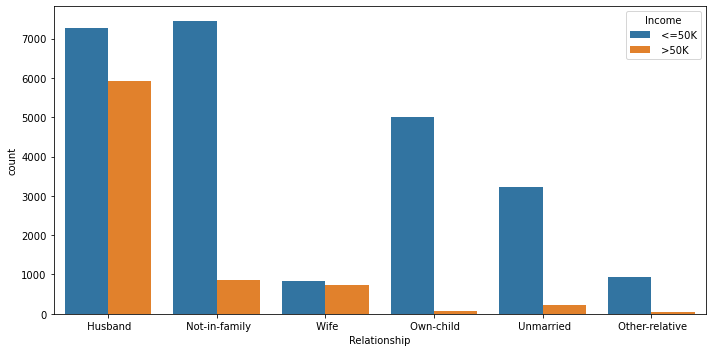

In [114]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Relationship', hue='Income', data=df)
plt.tight_layout()
plt.show()

# Encoding the Dataframe:

In [116]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0


We are not changing all the columns for Ordinal encoder becasue we have only nine columns as Ordinal encoder hence we did only for that five columns.

# Describe Dataset

In [117]:
#Statistical Summary
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.376290,1.897818e+05,10.298249,10.080590,2.611794,6.421959,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.470823,0.240817
std,13.640642,1.581995,1.055498e+05,3.870317,2.572709,1.506225,4.328539,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.083180,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


We have a outlier and skewness. So we will check in further step

# Correlation Checking:

In [118]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.059424,-0.076646,-0.010508,0.036527,-0.266292,0.012628,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234039
Workclass,0.059424,1.000000,-0.019111,-0.019358,-0.054412,0.042191,0.312611,0.012832,0.018893,0.002270,0.010680,-0.009878,-0.093413,0.001240,-0.055098
Fnlwgt,-0.076646,-0.019111,1.000000,-0.028156,-0.043159,0.028184,-0.000569,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.062703,-0.009481
Education,-0.010508,-0.019358,-0.028156,1.000000,0.359172,-0.038398,-0.046460,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.075189,0.079311
Education_num,0.036527,-0.054412,-0.043159,0.359172,1.000000,-0.069338,0.044150,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.090270,0.335182
Marital_status,-0.266292,0.042191,0.028184,-0.038398,-0.069338,1.000000,0.052891,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.020463,-0.199295
Occupation,0.012628,0.312611,-0.000569,-0.046460,0.044150,0.052891,1.000000,-0.014638,-0.009948,0.026149,0.012357,0.004530,-0.056999,-0.000467,0.010777
Relationship,-0.263698,0.012832,0.008922,-0.010879,-0.094145,0.185461,-0.014638,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010938,-0.250924
Race,0.028718,0.018893,-0.021278,0.014135,0.031825,-0.068025,-0.009948,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.111294,0.071853
Sex,0.088832,0.002270,0.026882,-0.027349,0.012256,-0.129337,0.026149,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.003007,0.215995


Correlation using heatmap

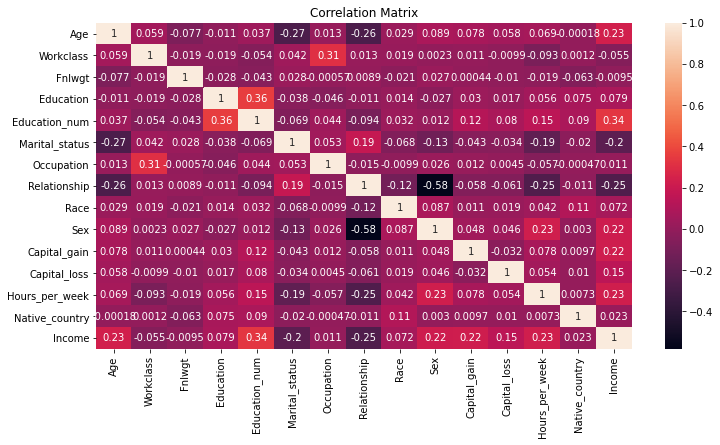

In [122]:
corr_mat=df.corr()

plt.figure(figsize=[12,6])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Here, we can see the highest correlation with Education num is 34%.

Also, It is clearly indicating the fnlwgt column is have negative and almost zero correction with target columns. Hence, I have decided to drop this column in next step.

In [123]:
df=df.drop(columns=["Fnlwgt"])

# Outlier Checking 

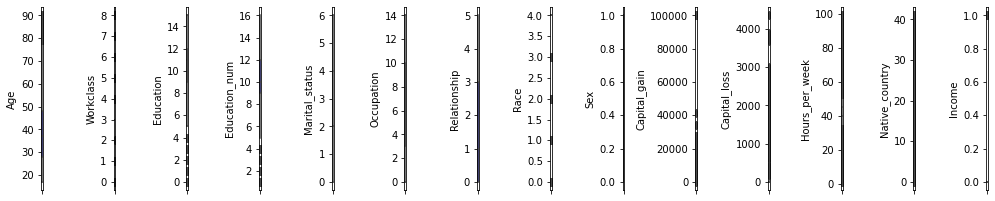

In [124]:
collist=df.columns.values
ncol=22
nrow=16
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In the above - we have an outlier in all the columns which are 'Age','Workclass','Education','Education_num','Marital_status','Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain','Capital_loss', 'Hours_per_week','Native_country','Income'.

# Checking Skewness

In [126]:
df.skew()

Age                0.558738
Workclass          1.167293
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.126702
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.205890
Income             1.212383
dtype: float64

From the above info - we can see the skewness in the dataset. But we need to skip the columns which we have encoded Because those are categorical based We won't consider that columns having skewness.

Category Data:- 'Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income'

So, We need to consider the numerical columns for skewness which is Capital gain and loss columns

Also, We can consider the -/+.5 is standard

# Data Cleaning

# Removing Outlier

In [127]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(32560, 14)

In [128]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([12, 11,  7, ...,  7,  7,  7], dtype=int64))


In [129]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(32560, 14)
(28094, 14)


In [130]:
Loss_percentage=(32560-28094)/32560*100
print(Loss_percentage)

13.716216216216214


Actually, We are having a 14%(rounded Off) dataloss in the dataset which are strange but in the outlier column we can see all the columns are having outlier. Hence, it is good to go for further step.

In [131]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

We are spliting the dataset which are X is feature and Y is target.

# Data Transform for Remove Skewness

In [133]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF

array([[ 0.92791208,  1.06221853, -0.48824568, ..., -0.04005415,
        -2.21641234,  0.04355979],
       [ 0.13152464, -0.14675279,  0.07890399, ..., -0.04005415,
        -0.03939044,  0.04355979],
       [ 1.10261598, -0.14675279, -2.07181933, ..., -0.04005415,
        -0.03939044,  0.04355979],
       ...,
       [ 1.37684736, -0.14675279,  0.07890399, ..., -0.04005415,
        -0.03939044,  0.04355979],
       [-1.32827483, -0.14675279,  0.07890399, ..., -0.04005415,
        -1.72285534,  0.04355979],
       [ 1.04528612,  0.48877929,  0.07890399, ..., -0.04005415,
        -0.03939044,  0.04355979]])

In [134]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)
x

array([[ 0.92791208,  1.06221853, -0.48824568, ..., -0.04005415,
        -2.21641234,  0.04355979],
       [ 0.13152464, -0.14675279,  0.07890399, ..., -0.04005415,
        -0.03939044,  0.04355979],
       [ 1.10261598, -0.14675279, -2.07181933, ..., -0.04005415,
        -0.03939044,  0.04355979],
       ...,
       [ 1.37684736, -0.14675279,  0.07890399, ..., -0.04005415,
        -0.03939044,  0.04355979],
       [-1.32827483, -0.14675279,  0.07890399, ..., -0.04005415,
        -1.72285534,  0.04355979],
       [ 1.04528612,  0.48877929,  0.07890399, ..., -0.04005415,
        -0.03939044,  0.04355979]])

# Finding the Model and Random State:

I have choosed the logistic Regression because outcome has a two variable. Hence, I am going with classification Model.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (0,500):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,Y_train)
    predrf=LR.predict(x_test)
    acc = accuracy_score(Y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 84.16182228022305 on Random state 98


I have created the test size for 30% to find the best random state and Accuracy score. Finally, We got 84% accuracy score and Random state is 98.

# Creating Train-Test Split

In [136]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=98)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,Y_train)
pred=LR.predict(x_test)
print (accuracy_score(Y_test, pred))
print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))

0.8416182228022304
[[6269  319]
 [1016  825]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      6588
         1.0       0.72      0.45      0.55      1841

    accuracy                           0.84      8429
   macro avg       0.79      0.70      0.73      8429
weighted avg       0.83      0.84      0.83      8429



In [138]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,Y_train)
prid=DT.predict(x_test)
print (accuracy_score(Y_test, prid))
print (confusion_matrix(Y_test, prid))
print (classification_report(Y_test, prid))

0.8125519041404674
[[5777  811]
 [ 769 1072]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      6588
         1.0       0.57      0.58      0.58      1841

    accuracy                           0.81      8429
   macro avg       0.73      0.73      0.73      8429
weighted avg       0.81      0.81      0.81      8429



In [139]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,Y_train)
predi=RF.predict(x_test)
print (accuracy_score(Y_test, predi))
print (confusion_matrix(Y_test, predi))
print (classification_report(Y_test, predi))

0.8467196583224582
[[6053  535]
 [ 757 1084]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      6588
         1.0       0.67      0.59      0.63      1841

    accuracy                           0.85      8429
   macro avg       0.78      0.75      0.77      8429
weighted avg       0.84      0.85      0.84      8429



In [140]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,Y_train)
prd=svc.predict(x_test)
print (accuracy_score(Y_test, prd))
print (confusion_matrix(Y_test, prd))
print (classification_report(Y_test, prd))

0.8499228852770198
[[6275  313]
 [ 952  889]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      6588
         1.0       0.74      0.48      0.58      1841

    accuracy                           0.85      8429
   macro avg       0.80      0.72      0.75      8429
weighted avg       0.84      0.85      0.84      8429



Random Forest score is - 85%
Decision Tree score is - 81%
Logistic Regression Score is - 84%
SVC score is - 85%
We are getting the high accuracy with Random forest Regression model is 85%. It will be cross check with CV.

# Finding the best CV value:

In [145]:
from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score=cross_val_score(RF,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At score fold {j} is having the CV_Score is {cv_mean*100}")

At score fold 2 is having the CV_Score is 84.60881326973731
At score fold 3 is having the CV_Score is 84.56254253908617
At score fold 4 is having the CV_Score is 84.49848125521189
At score fold 5 is having the CV_Score is 84.37034343693911
At score fold 6 is having the CV_Score is 84.66578149966301
At score fold 7 is having the CV_Score is 84.3418891095221
At score fold 8 is having the CV_Score is 84.45221522303154
At score fold 9 is having the CV_Score is 84.38816775514655


Based on the above high score of Random Forest Regression. I have runned with RF to find best cv value. Here, I choosed cv=5 is best because almost everything is same. Hence. will check the cross validation other model.

In [146]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(LR,x,Y,cv=5)
scr=cross_val_score(DT,x,Y,cv=5)
sc=cross_val_score(RF,x,Y,cv=5)
scor=cross_val_score(svc,x,Y,cv=5)
print("Cross Validation Score of LR :",score.mean()*100)
print("Cross Validation Score of DT :",scr.mean()*100)
print("Cross Validation Score of RF :",sc.mean()*100)
print("Cross Validation Score of svc :",scor.mean()*100)

Cross Validation Score of LR : 82.91449869616076
Cross Validation Score of DT : 81.18104349081092
Cross Validation Score of RF : 84.50204643744514
Cross Validation Score of svc : 83.88623162360884


Minimum Difference in accuracy and cross_validation score is for Decision Tree is (0%). So, this is best model

# AUC ROC Curve:

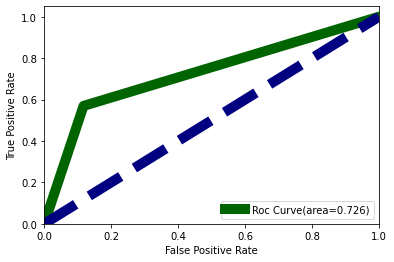

In [147]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(prid,Y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkgreen",lw=10,label='Roc Curve(area=%0.3f)'%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Hyper Parameter Tuning

In [148]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': np.arange(2,15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DT,parameters,cv=5)
GCV.fit(x_train,Y_train)
print(GCV.best_params_)

{'criterion': 'entropy', 'max_depth': 9}


In [149]:
DT=DecisionTreeClassifier(criterion="entropy",max_depth=9)
DT.fit(x_train,Y_train)
DT.score(x_train,Y_train)
predict=DT.predict(x_test)
AC=accuracy_score(Y_test,predict)
print("DecisionTree Score :",AC*100)

cv_score=cross_val_score(DT,x,Y,cv=5)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

DecisionTree Score : 86.0718946494246
CV Score : 85.2174901675905


# Model Saving

In [150]:
import pickle
filename='Censes_Income.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [152]:
Loaded_load = pickle.load(open('Censes_Income.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result*100)

84.67196583224582


In [153]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],predict[:]],index=["Predicted","Original"])
Conclusion

0    1    2    3    4    5    6    7    8    9   10   11   12  \
Predicted  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
Original   0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

            13   14   15   16   17   18   19   20   21   22   23   24   25  \
Predicted  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
Original   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   

            26   27   28   29   30   31   32   33   34   35   36   37   38  \
Predicted  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
Original   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            39   40   41   42   43   44   45   46   47   48   49   50   51  \
Predicted  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
Original   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

            52   53   54   55   56   57   58   59   60   61   62   63   64  \
Predicted  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Original   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

            65   66   67   68   69   70   71   72   73   74   75   76   77  \
Predicted  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
Original   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

            78   79   80   81   82   83   84   85   86   87   88   89   90  \
Predicted  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   
Original   1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   

            91   92   93   94   95   96   97   98   99  100  101  102  103  \
Predicted  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
Original   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   

           104  105  106  107  108  109  110  111  112  113  114  115  116  \
Predicted  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
Original   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

           117  118  119  120  121  122  123  124  125  126  127  128  129  \
Predicted  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
Original   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

           130  131  132  133  134  135  136  137  138  139  140  141  142  \
Predicted  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Original   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           143  144  145  146  147  148  149  150  151  152  153  154  155  \
Predicted  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
Original   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           156  157  158  159  160  161  162  163  164  165  166  167  168  \
Predicted  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Original   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           169  170  171  172  173  174  175  176  177  178  179  180  181  \
Predicted  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Original   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

           182  183  184  185  186  187  188  189  190  191  192  193  194  \
Predicted  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0   
Original   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   

           195  196  197  198  199  200  201  202  203  204  205  206  207  \
Predicted  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
Original   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

           208  209  210  211  212  213  214  215  216  217  218  219  220  \
Predicted  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
Original   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   

           221  22

We have a the outcome for this model with 85%(rounded Off) score.